In [222]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
data_folder = '../data'
data_files = os.listdir(data_folder)

In [224]:
for file in data_files:
    print("for year "+file[-8:-4]+" : " + file)

for year 2014 : 22306_24.65_73.75_2014.csv
for year 2000 : 22306_24.65_73.75_2000.csv
for year 2012 : 22306_24.65_73.75_2012.csv
for year 2013 : 22306_24.65_73.75_2013.csv
for year 2008 : 22306_24.65_73.75_2008.csv
for year 2005 : 22306_24.65_73.75_2005.csv
for year 2007 : 22306_24.65_73.75_2007.csv
for year 2006 : 22306_24.65_73.75_2006.csv
for year 2009 : 22306_24.65_73.75_2009.csv
for year 2001 : 22306_24.65_73.75_2001.csv
for year 2011 : 22306_24.65_73.75_2011.csv
for year 2004 : 22306_24.65_73.75_2004.csv
for year 2010 : 22306_24.65_73.75_2010.csv
for year 2003 : 22306_24.65_73.75_2003.csv
for year 2002 : 22306_24.65_73.75_2002.csv


In [225]:
year_2014 = pd.read_csv(data_folder+'/'+data_files[0])
year_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8762 entries, 0 to 8761
Data columns (total 35 columns):
Source                      8762 non-null object
Location ID                 8762 non-null object
City                        8762 non-null object
State                       8762 non-null object
Country                     8762 non-null object
Latitude                    8762 non-null object
Longitude                   8762 non-null object
Time Zone                   8762 non-null object
Elevation                   8762 non-null object
Local Time Zone             8762 non-null object
Clearsky DHI Units          8762 non-null object
Clearsky DNI Units          8762 non-null object
Clearsky GHI Units          8762 non-null object
Dew Point Units             8762 non-null object
DHI Units                   8762 non-null object
DHI Perez Units             8762 non-null object
DNI Units                   8762 non-null object
DNI Perez Units             8762 non-null object
GHI Units  

In [226]:
new_columns = year_2014.iloc[1]
year = year_2014[2:]
year.columns =new_columns
year = year.loc[:, year.columns.notnull()]

# for counter,i in enumerate(new_columns):
#     print(i)


year = year.drop(columns=['Year','Month','Day','Minute','Hour','DHI','DNI','Clearsky DHI','Clearsky DNI','Fill Flag'])

In [227]:
year.head()

1,GHI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Snow Depth,Wind Direction,Wind Speed
2,0,0,4,12.751339552289267,957.9305419921875,58.41139916942352,177.55742015012578,1.3668830583200968,0.0,73.88963317871094,4.430836200714111
3,0,0,6,12.196895002047142,957.7622680664062,67.29592773800267,168.03725969433503,1.4700043477445826,0.0,75.10269927978516,4.453418731689453
4,0,0,7,11.806139366268553,957.8780517578125,72.56749007380043,154.41832139803458,1.5719694344243218,0.0,74.26346588134766,4.3355021476745605
5,0,0,7,11.510595990320212,957.6235961914062,75.29933981073673,140.83665499983437,1.6669825069938207,0.0,72.37870025634766,4.2338972091674805
6,0,0,7,11.306806960929293,957.932861328125,76.7992879237338,127.37552025553532,1.7609774282137391,0.0,70.31179809570312,4.197237968444824


In [228]:
x = np.arange(year.shape[0])[0:100]
y = year['GHI'][0:100]

In [212]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='dkumar', api_key='*************************8')

x = np.arange(year.shape[0])
y = year['GHI']
trace = go.Scatter(
    x = x,
    y = y
)

data = [trace]

py.iplot(data, filename='basic-line')



trace = go.Scatter(
    x = x,
    y = y
)

data = [trace]

py.iplot(data, filename='basic-line')

PlotlyRequestError: Aw, snap! You tried to use our API as the user 'dkumar', but the supplied API key doesn't match our records. You can view your API key at https://plot.ly/settings/api

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to https://plot.ly/<language>/getting-started (e.g., https://plot.ly/python/getting-started) for more information.

Make sure that you're logged in as dkumar.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

### Heatmap : Correlation plot

In [215]:
year = year.astype('float64')
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 2 to 8761
Data columns (total 11 columns):
GHI                   8760 non-null float64
Clearsky GHI          8760 non-null float64
Dew Point             8760 non-null float64
Temperature           8760 non-null float64
Pressure              8760 non-null float64
Relative Humidity     8760 non-null float64
Solar Zenith Angle    8760 non-null float64
Precipitable Water    8760 non-null float64
Snow Depth            8760 non-null float64
Wind Direction        8760 non-null float64
Wind Speed            8760 non-null float64
dtypes: float64(11)
memory usage: 752.9 KB


In [216]:
corr_hm = sns.heatmap(year.corr(), 
                xticklabels=year.corr().columns,
                yticklabels=year.corr().columns,vmin=0,vmax=1,cmap="YlGnBu")
plt.show()
# plt.tight_layout()

corr_hm.figure.savefig("../docs/corr_heatmap.png",dpi=200,bbox_inches = "tight")

<IPython.core.display.Javascript object>


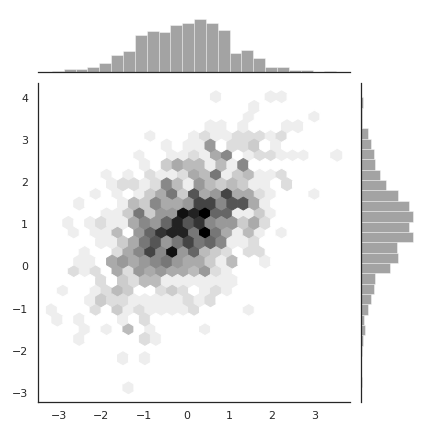

In [217]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## XGBOOST Classfier

In [229]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer

In [230]:
X = year.drop(columns=['GHI'])
Y = year.pop('GHI')

transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)
print(transformer)
print(X_norm)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=test_size, random_state=seed)
model = XGBClassifier()

Normalizer(copy=True, norm='l2')
[[0.         0.00408625 0.0130263  ... 0.         0.07548294 0.00452638]
 [0.         0.00613678 0.01247493 ... 0.         0.07681474 0.00455494]
 [0.         0.00717292 0.01209779 ... 0.         0.076098   0.0044426 ]
 ...
 [0.         0.         0.01546334 ... 0.         0.06476746 0.00437793]
 [0.         0.00102765 0.01465211 ... 0.         0.06889262 0.00445176]
 [0.         0.00204918 0.01382877 ... 0.         0.07267697 0.00448728]]


In [220]:
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(model)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

<IPython.core.display.Javascript object>


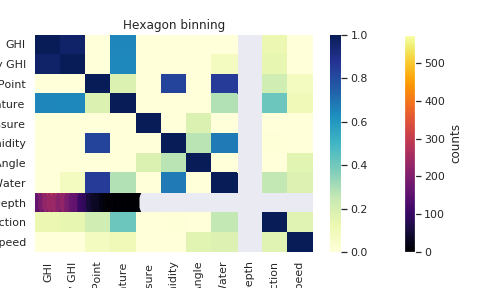

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib notebook
%matplotlib notebook

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

plt.show()


In [214]:
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.1)

p = figure(title="Manual hex bin for 50000 points", tools="wheel_zoom,pan,reset",
           match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(q="q", r="r", size=0.1, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))

output_notebook()

show(p)

Loading BokehJS ...